# Example Template for Building Filters

Dependencies

In [2]:
import numpy as np
import math
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad
from scipy.ndimage import rotate as scipy_rotate
from scipy.ndimage import shift as scipy_shift

Everything you need to construct Klein filters

In [15]:
def formula(x,y,th1,th2):
    assert(th1 < np.pi and th1 >= 0)
    assert(th2 < 2*np.pi and th2 >= 0)

    def q2(a):
        return(a)

    def q3(a):
        return(((2*a - 1)**2) - 1)

    return np.sin(th2)*q2(np.cos(th1)*x + np.sin(th1)*y) + np.cos(th2)*q3(np.cos(th1)*x + np.sin(th1)*y)

def legendre_integrand(x, y1, y2, th1, th2):
    def int_3(y, x, th1, th2):
        return formula(x,y,th1,th2)

    I = quad(int_3, y1, y2, args=(x, th1, th2))
    return I[0]

def legendre_klein_bottle(num_th1=8, num_th2=8, width=5, thresh=None):
    area = (1.0/width) ** 2
    angles1 = [ float(i * np.pi) / num_th1 for i in range(num_th1) ]
    angles2 = [ float(i * 2*np.pi) / num_th1 for i in range(num_th2) ]
    list_weights = []
    for ti in range(len(angles1)):
        for tj in range(len(angles2)):
            th1, th2 = angles1[ti], angles2[tj]
            M = np.zeros([width, width])
            for i in range(width):
                for j in range(width):
                    x1 = i * 1.0 / width
                    x2 = x1 + 1.0 / width
                    y1 = j * 1.0 / width
                    y2 = y1 + 1.0 / width
                    I = quad(legendre_integrand, x1, x2, args=(y1, y2, th1, th2))
                    value = I[0] #/ area
                    M[j,i] = value
            M = M - np.mean(M)
            M = M / np.std(M.flatten())
            if thresh:
                M[M>=thresh]=1
                M[M<thresh]=0
            list_weights.append(M)
    return np.array(list_weights)

Make a set of 64 3x3 filters

In [16]:
grids = legendre_klein_bottle(8,8,3,None)

Print the first 10 filters

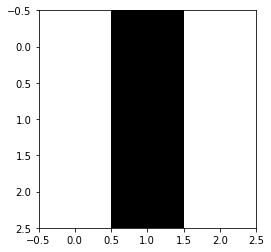

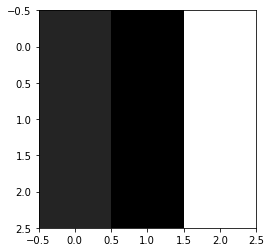

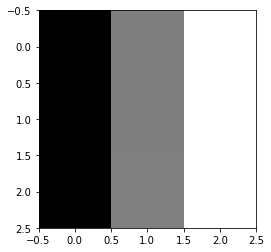

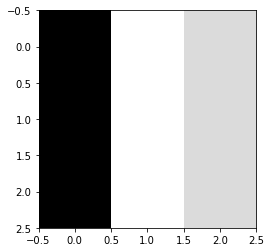

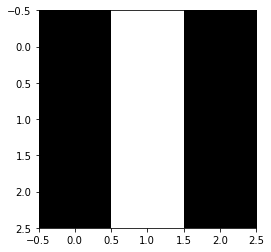

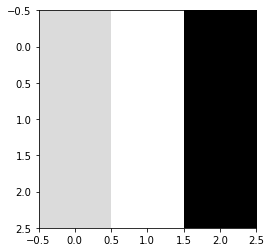

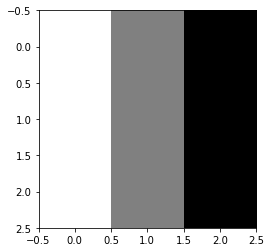

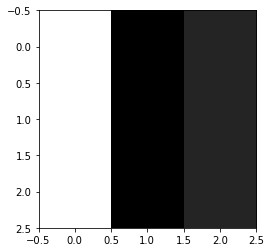

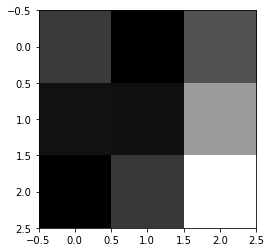

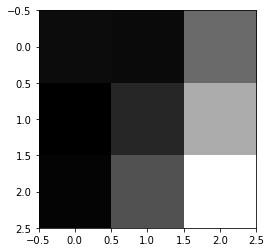

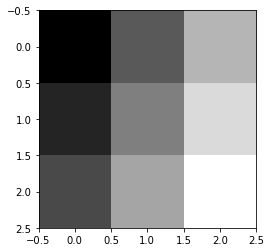

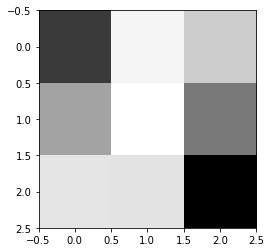

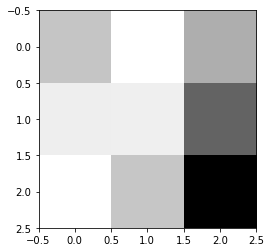

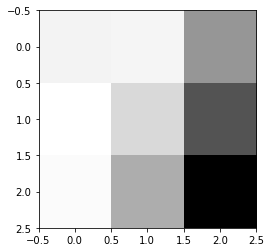

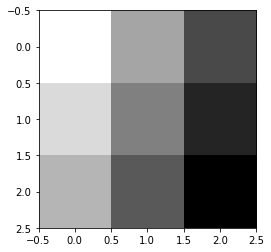

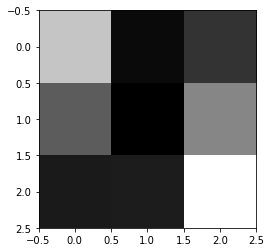

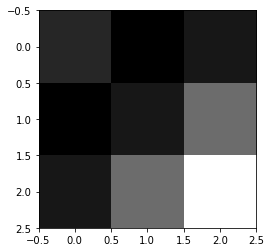

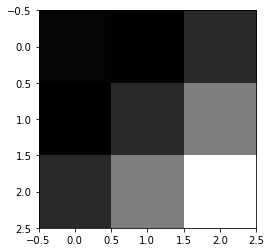

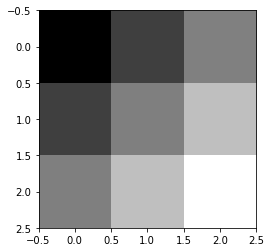

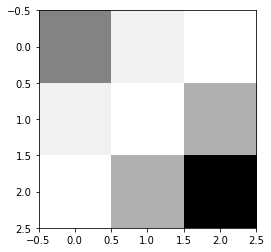

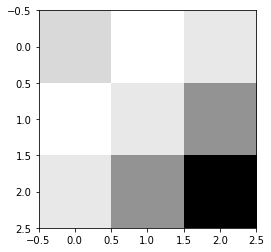

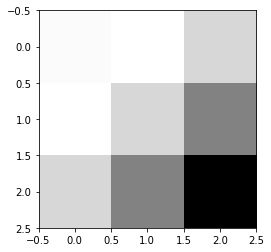

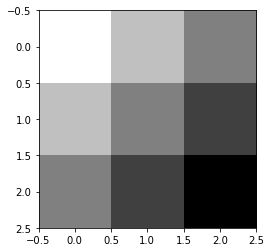

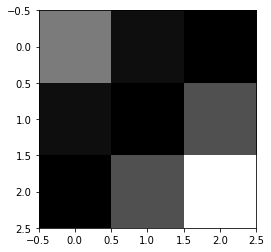

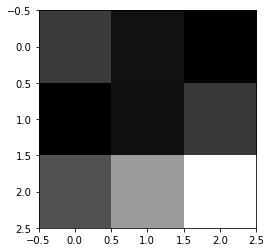

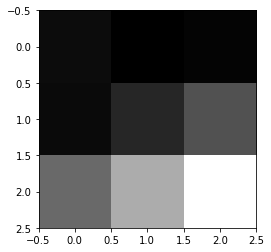

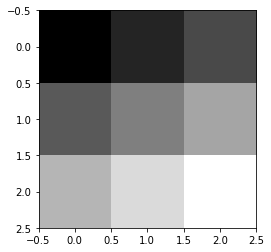

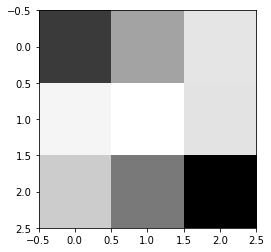

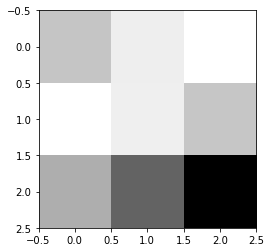

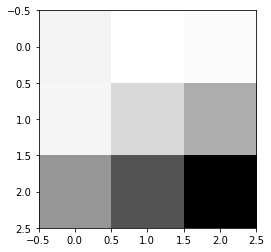

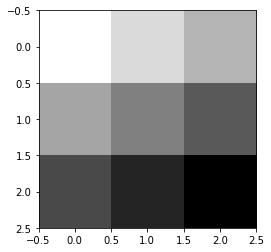

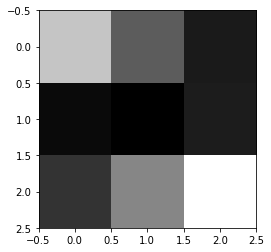

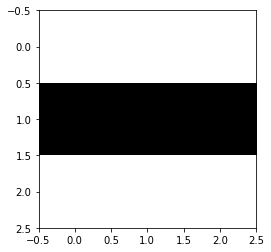

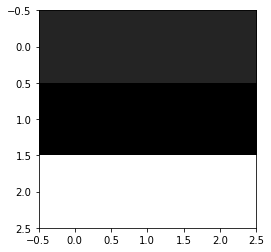

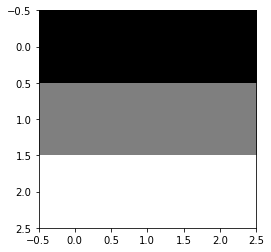

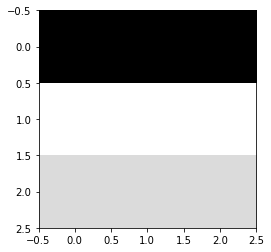

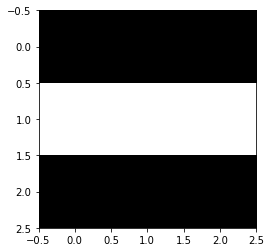

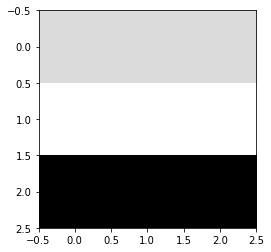

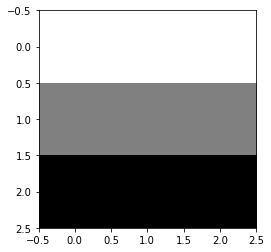

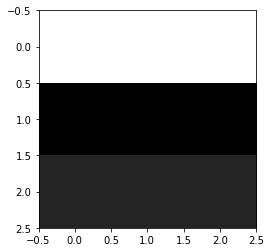

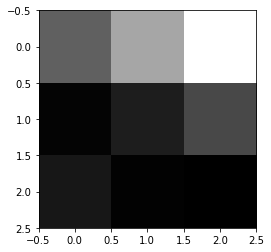

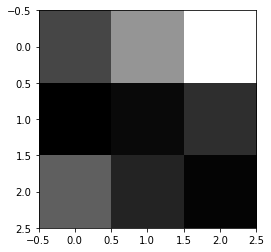

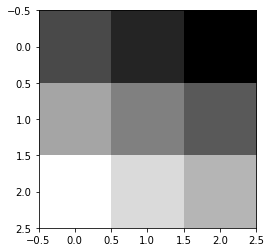

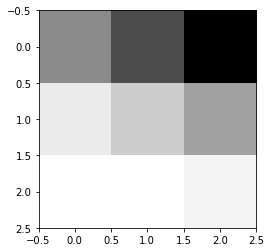

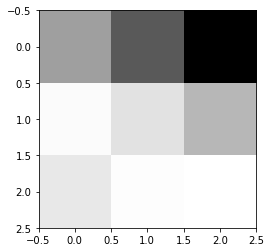

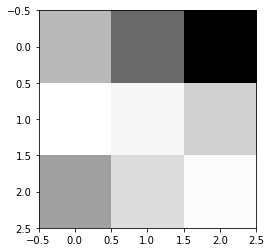

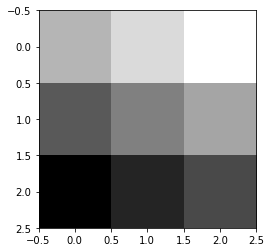

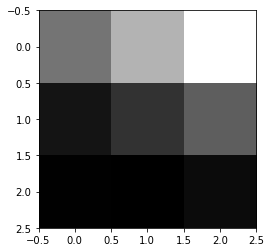

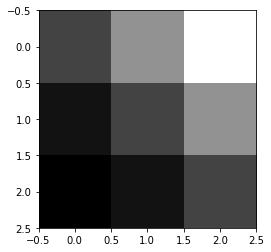

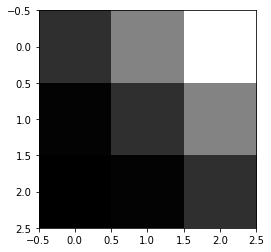

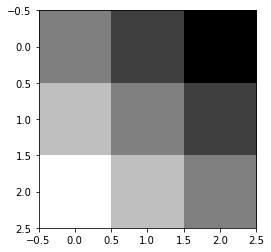

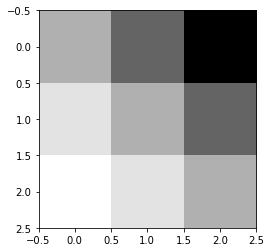

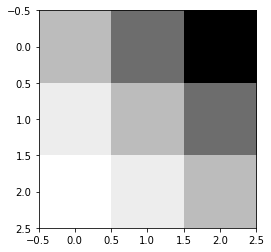

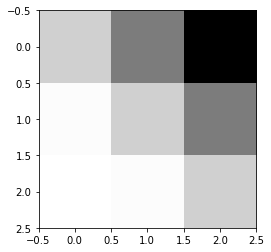

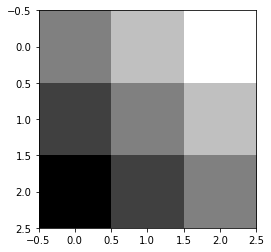

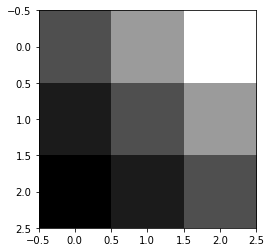

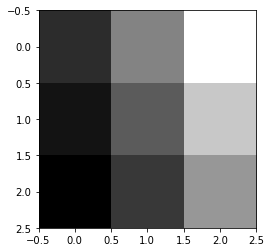

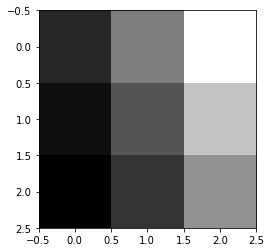

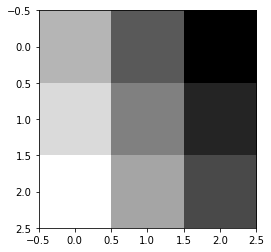

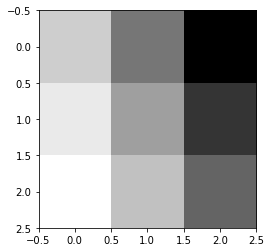

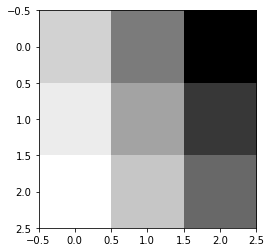

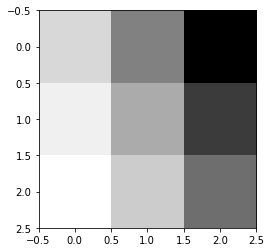

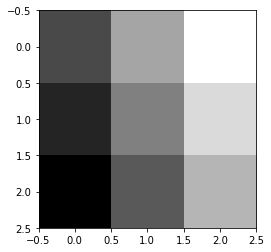

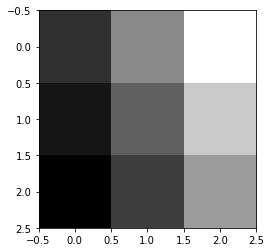

In [14]:
for i,grid in enumerate(grids):
    plt.imshow(grid, cmap='gray')
    plt.show()

## Example of an animation which might help you visualize over time
Don't run the code below, unless you want to check out the animation. THere's some weird stuff with matplotlib and notebooks and this can make your life more difficult. You could totally ammend the code below though to show a bunch of simultaneous subplotted filters doing their actions in time, which could be really amazing!

In [ ]:
%matplotlib notebook

fig = plt.figure()

ims = [[plt.imshow(grid, cmap='gray',animated=True)] for grid in grids]

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                repeat_delay=1000)
plt.show()